In [77]:
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import itertools

from sklearn.model_selection import train_test_split, StratifiedShuffleSplit, cross_val_score

from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, RandomForestClassifier, ExtraTreesClassifier
from sklearn.linear_model import SGDRegressor, BayesianRidge
from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import make_scorer, confusion_matrix
from sklearn.dummy import DummyRegressor, DummyClassifier
from sklearn.preprocessing import PolynomialFeatures

In [115]:
#Importing each sheet from the dataset 
plants = pd.read_csv('Plants - plants.csv')
plants.head()

,Batch Number,Plant Date,Class,Fresh Weight (g),Head Weight (g),Radial Diameter (mm),Polar Diameter (mm),Diameter Ratio,Leaves,Density (kg/L),Leaf Area (cm^2),Square ID,Check Date,Flight Date,Remove
0,402,11/4/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,30/4/2020,NaN,NaN
1,402,11/4/2020,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,30/4/2020,NaN,NaN
2,402,11/4/2020,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,30/4/2020,NaN,NaN
3,402,11/4/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,30/4/2020,NaN,NaN
4,402,11/4/2020,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,30/4/2020,NaN,NaN


In [116]:
#Renaming Columns in Plants Sheet
col_names ={'Fresh Weight (g)': 'Fresh Weight', 'Head Weight (g)': 'Head Weight','Radial Diameter (mm)': 'Radial Diameter','Polar Diameter (mm)': 'Polar Diameter','Density (kg/L)':'Density', 'Leaf Area (cm^2)':'Leaf Area'}
plants.rename(columns = col_names, inplace = True )

In [117]:
#Confirming if columns names have been changed successfully
plants.head()

,Batch Number,Plant Date,Class,Fresh Weight,Head Weight,Radial Diameter,Polar Diameter,Diameter Ratio,Leaves,Density,Leaf Area,Square ID,Check Date,Flight Date,Remove
0,402,11/4/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,185.0,208,30/4/2020,NaN,NaN
1,402,11/4/2020,4,15.0,NaN,NaN,NaN,NaN,11.0,NaN,156.0,208,30/4/2020,NaN,NaN
2,402,11/4/2020,1,16.0,NaN,NaN,NaN,NaN,12.0,NaN,137.0,208,30/4/2020,NaN,NaN
3,402,11/4/2020,3,15.0,NaN,NaN,NaN,NaN,10.0,NaN,225.0,208,30/4/2020,NaN,NaN
4,402,11/4/2020,3,15.0,NaN,NaN,NaN,NaN,11.0,NaN,157.0,208,30/4/2020,NaN,NaN


In [141]:
plants.describe(include = 'all')

,Batch Number,Plant Date,Class,Fresh Weight,Radial Diameter,Polar Diameter,Leaves,Leaf Area,Square ID,Check Date,Flight Date,Remove
count,4859.000000,4685,4859.000000,4859.000000,4859.000000,4859.000000,100.000000,4859.000000,4859.000000,4859,472,70
unique,NaN,37,NaN,NaN,NaN,NaN,NaN,NaN,NaN,63,3,1
top,NaN,11/8/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14/10/2020,22/6/2020,r
freq,NaN,400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,135,262,70
mean,621.778349,NaN,2.973040,469.593874,100.196131,97.053097,17.070000,495.244906,403.202099,NaN,NaN,NaN
std,92.932427,NaN,1.422882,295.798056,42.657149,34.698330,28.063512,212.620740,416.029674,NaN,NaN,NaN
min,402.000000,NaN,1.000000,0.632000,0.000000,0.000000,7.000000,25.000000,4.000000,NaN,NaN,NaN
25%,542.000000,NaN,2.000000,229.500000,65.000000,72.000000,8.000000,337.000000,94.000000,NaN,NaN,NaN
50%,647.000000,NaN,3.000000,426.000000,110.000000,100.000000,9.500000,471.000000,247.000000,NaN,NaN,NaN
75%,698.000000,NaN,4.000000,677.000000,138.000000,124.500000,12.500000,620.000000,529.000000,NaN,NaN,NaN


In [119]:
plants.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4859 entries, 0 to 4858
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Batch Number     4859 non-null   int64  
 1   Plant Date       4685 non-null   object 
 2   Class            4859 non-null   int64  
 3   Fresh Weight     4858 non-null   float64
 4   Head Weight      4754 non-null   float64
 5   Radial Diameter  4754 non-null   float64
 6   Polar Diameter   4754 non-null   float64
 7   Diameter Ratio   4752 non-null   float64
 8   Leaves           100 non-null    float64
 9   Density          4672 non-null   float64
 10  Leaf Area        4857 non-null   float64
 11  Square ID        4859 non-null   int64  
 12  Check Date       4859 non-null   object 
 13  Flight Date      472 non-null    object 
 14  Remove           70 non-null     object 
dtypes: float64(8), int64(3), object(4)
memory usage: 569.5+ KB


In [134]:
plants.nunique()

Batch Number         64
Plant Date           37
Class                 5
Fresh Weight       1133
Radial Diameter     160
Polar Diameter      152
Leaves               19
Leaf Area           925
Square ID           171
Check Date           63
Flight Date           3
Remove                1
dtype: int64

In [139]:
#Importing flight date sheet
flight_date = pd.read_csv('Flight dates - flight dates.csv')
flight_date.head()

,Batch Number,Flight Date
0,402,30/4/2020
1,408,30/4/2020
2,409,30/4/2020
3,466,1/7/2020
4,467,1/7/2020


In [140]:
flight_date.nunique()

Batch Number    50
Flight Date     22
dtype: int64

In [59]:
from datetime import datetime
def get_datetime(date):
    date_string = str(date)
    return datetime.date(date_string[:3], date_string[4:6], date_string[6:8])

In [14]:
#Importing weather data sheet
weather = pd.read_csv('Weather.csv')
weather.head()

,Past_date,Solar Radiation [avg],Precipitation [sum],Wind Speed [avg],Wind Speed [max],Battery Voltage [last],Leaf Wetness [time],Air Temperature [avg],Air Temperature [max],Air Temperature [min],Relative Humidity [avg],Dew Point [avg],Dew Point [min],ET0 [result]
0,5/14/14 0:00,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,5/15/14 0:00,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,5/16/14 0:00,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,5/17/14 0:00,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,5/18/14 0:00,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [15]:
#Renaming Column names in Weather
col_names ={'Solar Radiation [avg]': 'Solar Radiation', 'Precipitation [sum]': 'Precipitation','Wind Speed [avg]': 'Wind_Speed_Avg', 'Wind Speed [max]': 'Wind_Speed_Max', 'Battery Voltage [last]': 'Battery Voltage','Leaf Wetness [time]':'Leaf Wetness', 'Air Temperature [avg]':'Air_Temp_Avg', 'Air Temperature [max]': 'Air_Temp_Max', 'Air Temperature [min]': 'Air_Temp_min', 'Relative Humidity [avg]': 'Relative Humidity', 'Dew Point [avg]': 'Dew_Point_Avg', 'Dew Point [min]':'Dew_Point_Min', 'ET0 [result]': 'ET0'}
weather.rename(columns = col_names, inplace = True)

In [16]:
#Confirming column names
weather.head()

,Past_date,Solar Radiation,Precipitation,Wind_Speed_Avg,Wind_Speed_Max,Battery Voltage,Leaf Wetness,Air_Temp_Avg,Air_Temp_Max,Air_Temp_min,Relative Humidity,Dew_Point_Avg,Dew_Point_Min,ET0
0,5/14/14 0:00,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,NaN
1,5/15/14 0:00,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.6
2,5/16/14 0:00,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.9
3,5/17/14 0:00,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.6
4,5/18/14 0:00,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.2


In [173]:
wdf = weather.fillna(weather.mean())
wdf

,Past_date,Solar Radiation,Precipitation,Wind_Speed_Avg,Wind_Speed_Max,Battery Voltage,Leaf Wetness,Air_Temp_Avg,Air_Temp_Max,Air_Temp_min,Relative Humidity,Dew_Point_Avg,Dew_Point_Min,ET0
0,5/14/14 0:00,159,0.0,1.4,3.3,6834,70,14.27,18.90,7.19,64.95,7.0,5.6,1.815542
1,5/15/14 0:00,280,0.0,0.6,2.3,6894,500,13.51,22.06,3.04,72.91,7.6,3.0,3.600000
2,5/16/14 0:00,186,3.4,0.8,2.7,6874,375,15.65,24.24,7.23,74.69,10.5,6.5,2.900000
3,5/17/14 0:00,221,0.0,1.0,3.3,6874,565,17.46,25.70,9.93,71.42,11.5,8.1,3.600000
4,5/18/14 0:00,255,0.0,2.1,5.5,6854,625,16.85,24.62,8.45,74.45,11.4,8.3,4.200000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2551,5/17/21 0:00,196,1.4,2.2,5.5,7166,0,10.51,14.53,8.95,99.86,10.3,8.8,1.815542
2552,5/17/21 0:00,173,2.8,1.8,5.5,6864,0,10.80,14.53,8.38,99.86,10.6,8.2,1.815542
2553,5/18/21 0:00,311,0.0,1.4,5.0,6854,0,10.29,17.14,3.15,92.94,8.8,3.0,3.400000
2554,5/19/21 0:00,232,6.6,1.8,5.5,6864,0,11.39,16.61,7.50,90.32,9.4,5.2,3.000000


In [176]:
wdf.isnull().sum()

Past_date            0
Solar Radiation      0
Precipitation        0
Wind_Speed_Avg       0
Wind_Speed_Max       0
Battery Voltage      0
Leaf Wetness         0
Air_Temp_Avg         0
Air_Temp_Max         0
Air_Temp_min         0
Relative Humidity    0
Dew_Point_Avg        0
Dew_Point_Min        0
ET0                  0
dtype: int64

In [174]:
weather.isnull().sum()

Past_date             0
Solar Radiation       0
Precipitation         0
Wind_Speed_Avg        0
Wind_Speed_Max        0
Battery Voltage       0
Leaf Wetness          0
Air_Temp_Avg          0
Air_Temp_Max          0
Air_Temp_min          0
Relative Humidity     0
Dew_Point_Avg         3
Dew_Point_Min        46
ET0                  66
dtype: int64

In [175]:
weather.isnull().sum()

Past_date             0
Solar Radiation       0
Precipitation         0
Wind_Speed_Avg        0
Wind_Speed_Max        0
Battery Voltage       0
Leaf Wetness          0
Air_Temp_Avg          0
Air_Temp_Max          0
Air_Temp_min          0
Relative Humidity     0
Dew_Point_Avg         3
Dew_Point_Min        46
ET0                  66
dtype: int64

In [128]:
#Importing planting data
planting = pd.read_csv('Planting.csv')
planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Planting_Batch,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2/6/20 0:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2/7/20 0:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2/7/20 0:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2/8/20 0:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2/10/20 0:00,NaN,0.0,NaN,770,13944.0,7.0


In [133]:
planting.nunique()

Crop                16
Column2              0
Column3              0
Plant_Date         206
Column1              0
Region             118
Column4              0
Planting_Batch    1680
Volume_Planted     987
Planting_Wk        148
dtype: int64

In [142]:
col_names ={'Planting_Batch': 'Batch Number'}
planting.rename(columns = col_names, inplace = True)
planting.head()

,Crop,Column2,Column3,Plant_Date,Column1,Region,Column4,Batch Number,Volume_Planted,Planting_Wk
0,3,NaN,NaN,2/6/20 0:00,NaN,0.0,NaN,392,198912.0,6.0
1,3,NaN,NaN,2/7/20 0:00,NaN,0.0,NaN,503,63840.0,6.0
2,3,NaN,NaN,2/7/20 0:00,NaN,0.0,NaN,614,179928.0,6.0
3,3,NaN,NaN,2/8/20 0:00,NaN,0.0,NaN,725,200256.0,6.0
4,3,NaN,NaN,2/10/20 0:00,NaN,0.0,NaN,770,13944.0,7.0


Handling missing values and dropping some columns

In [143]:
#Checking for missing values on Plants Sheet
plants.isnull().sum()

Batch Number          0
Plant Date          174
Class                 0
Fresh Weight          0
Radial Diameter       0
Polar Diameter        0
Leaves             4759
Leaf Area             0
Square ID             0
Check Date            0
Flight Date        4387
Remove             4789
dtype: int64

In [144]:
plants.drop(['Diameter Ratio', 'Head Weight', 'Density'], axis = 1, inplace = True)


KeyError: "['Diameter Ratio' 'Head Weight' 'Density'] not found in axis"

In [145]:
plants.isnull().sum()

Batch Number          0
Plant Date          174
Class                 0
Fresh Weight          0
Radial Diameter       0
Polar Diameter        0
Leaves             4759
Leaf Area             0
Square ID             0
Check Date            0
Flight Date        4387
Remove             4789
dtype: int64

In [177]:
#Replacing missing values
plants['Leaf Area'].fillna(plants['Leaf Area'].mode()[0], inplace = True)

In [178]:
plants['Fresh Weight'].fillna(plants['Fresh Weight'].mode()[0], inplace = True)


In [179]:
plants['Radial Diameter'].fillna(plants['Radial Diameter'].mode()[0], inplace = True)

In [180]:
plants['Polar Diameter'].fillna(plants['Polar Diameter'].mode()[0], inplace = True)

In [181]:
plants.isnull().sum()

Batch Number          0
Plant Date          174
Class                 0
Fresh Weight          0
Radial Diameter       0
Polar Diameter        0
Leaves             4759
Leaf Area             0
Square ID             0
Check Date            0
Flight Date        4387
Remove             4789
dtype: int64

In [182]:
flight_date.isnull().sum()

Batch Number    0
Flight Date     0
dtype: int64

In [183]:
#Checking for missing values on Weather Sheet
weather.isnull().sum()

Past_date             0
Solar Radiation       0
Precipitation         0
Wind_Speed_Avg        0
Wind_Speed_Max        0
Battery Voltage       0
Leaf Wetness          0
Air_Temp_Avg          0
Air_Temp_Max          0
Air_Temp_min          0
Relative Humidity     0
Dew_Point_Avg         3
Dew_Point_Min        46
ET0                  66
dtype: int64

In [184]:
#Checking for missing values on Planting Sheet
planting.isnull().sum()

Crop              420
Plant_Date        420
Region            420
Batch Number      551
Volume_Planted    552
Planting_Wk       420
dtype: int64

In [185]:
#Dropping empty columns
planting.drop(['Column2', 'Column3', 'Column1', 'Column4'], axis = 1, inplace = True)

KeyError: "['Column2' 'Column3' 'Column1' 'Column4'] not found in axis"

In [186]:
#Checking for missing values on Planting Sheet
flight_date.isnull().sum()

Batch Number    0
Flight Date     0
dtype: int64

In [190]:
#Merging Data
data_list = (flight_date, plants, planting)
pf = pd.concat(data_list)
pf

,Batch Number,Flight Date,Plant Date,Class,Fresh Weight,Radial Diameter,Polar Diameter,Leaves,Leaf Area,Square ID,Check Date,Remove,Crop,Plant_Date,Region,Volume_Planted,Planting_Wk
0,402,30/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,408,30/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,409,30/4/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,466,1/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,467,1/7/2020,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2368,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ice 309,"2,1",387.0,NaN,80.0
2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ice 309,"2,2",400.0,NaN,274.0
2370,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ice 309,"2,3",319.0,NaN,224.0
2371,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Ice 309,"2,4",155.0,NaN,249.0


In [191]:
pf.isnull().sum()

Batch Number        551
Flight Date        6760
Plant Date         2597
Class              2423
Fresh Weight       2423
Radial Diameter    2423
Polar Diameter     2423
Leaves             7182
Leaf Area          2423
Square ID          2423
Check Date         2423
Remove             7212
Crop               5329
Plant_Date         5329
Region             5329
Volume_Planted     5461
Planting_Wk        5329
dtype: int64

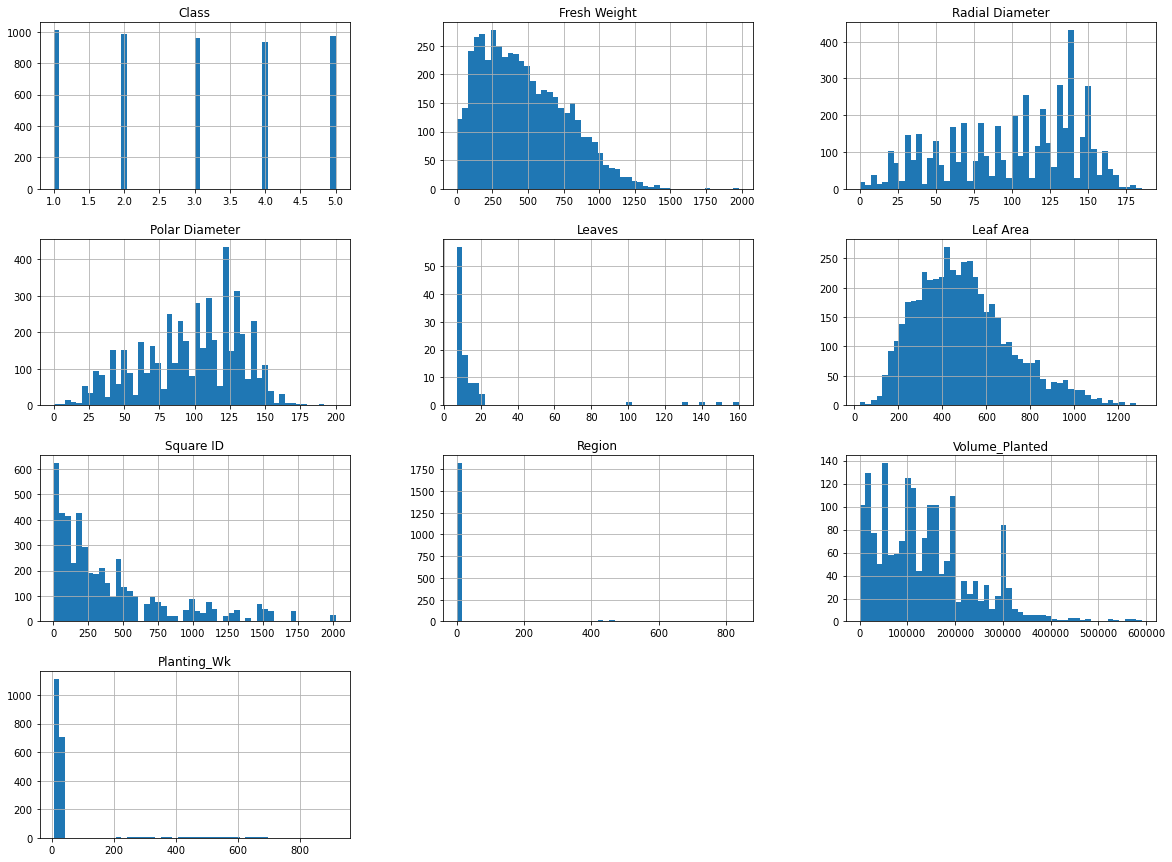

In [195]:
pf_hist = pf.hist(bins=50, figsize=(20,15))

In [188]:
planting_flight.isnull().sum()

Batch Number      2323
Flight Date       2323
Crop               420
Column2           2373
Column3           2373
Plant_Date         420
Column1           2373
Region             420
Column4           2373
Planting_Batch     551
Volume_Planted     552
Planting_Wk        420
dtype: int64

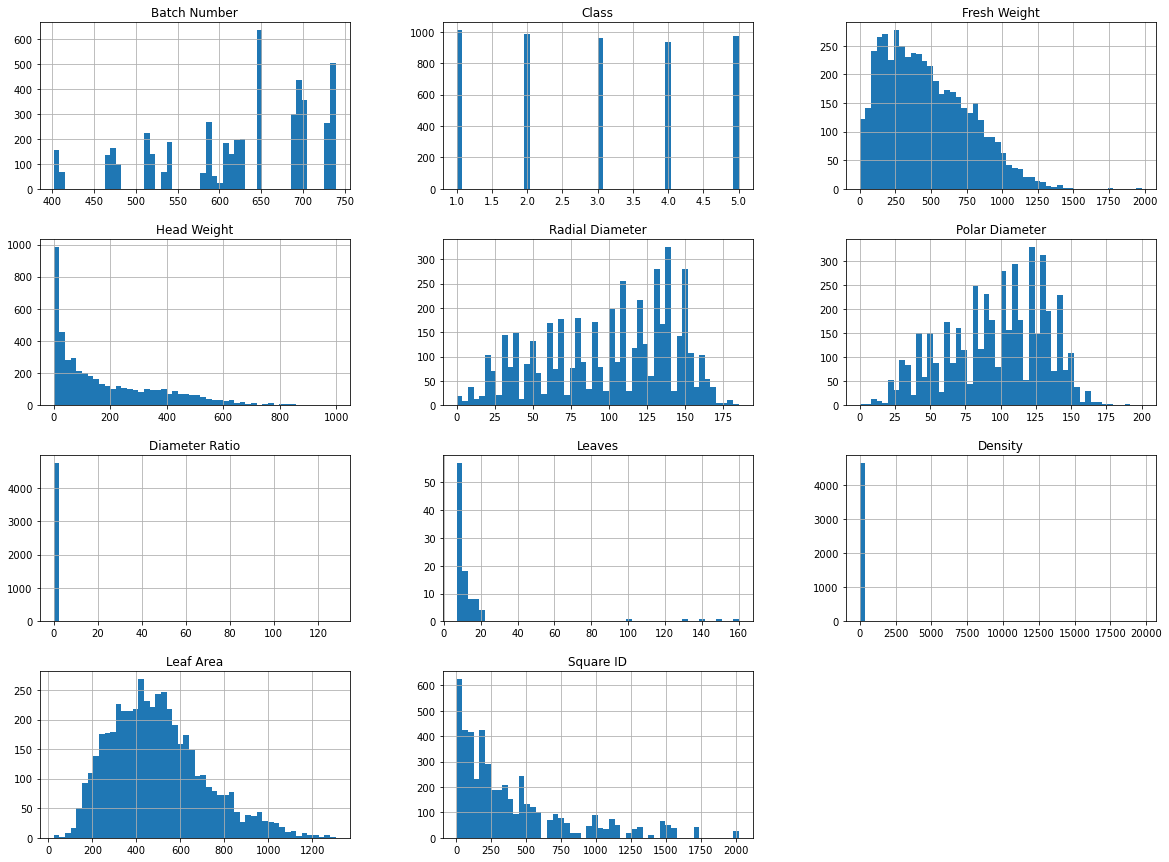

In [37]:
#Visualising each sheet
plants_hist = plants.hist(bins=50, figsize=(20,15))

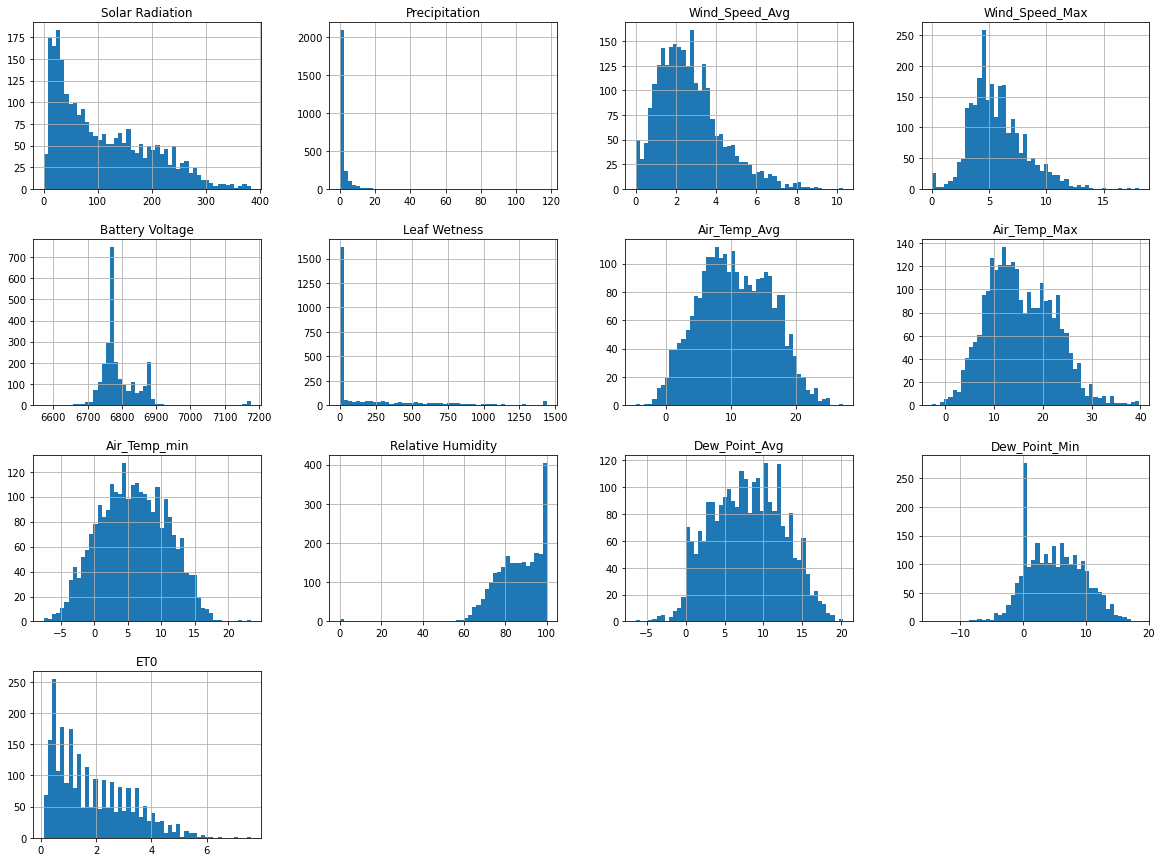

In [38]:
_ = weather.hist(bins=50, figsize=(20,15))

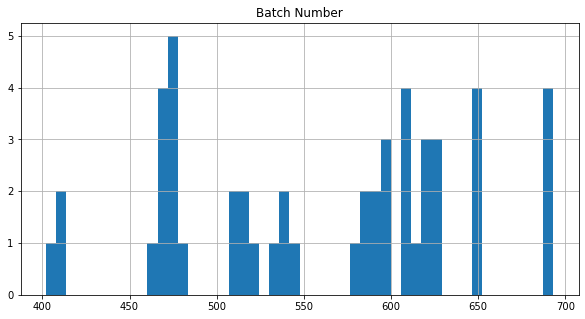

In [41]:
_ = flight_date.hist(bins=50, figsize=(10,5))

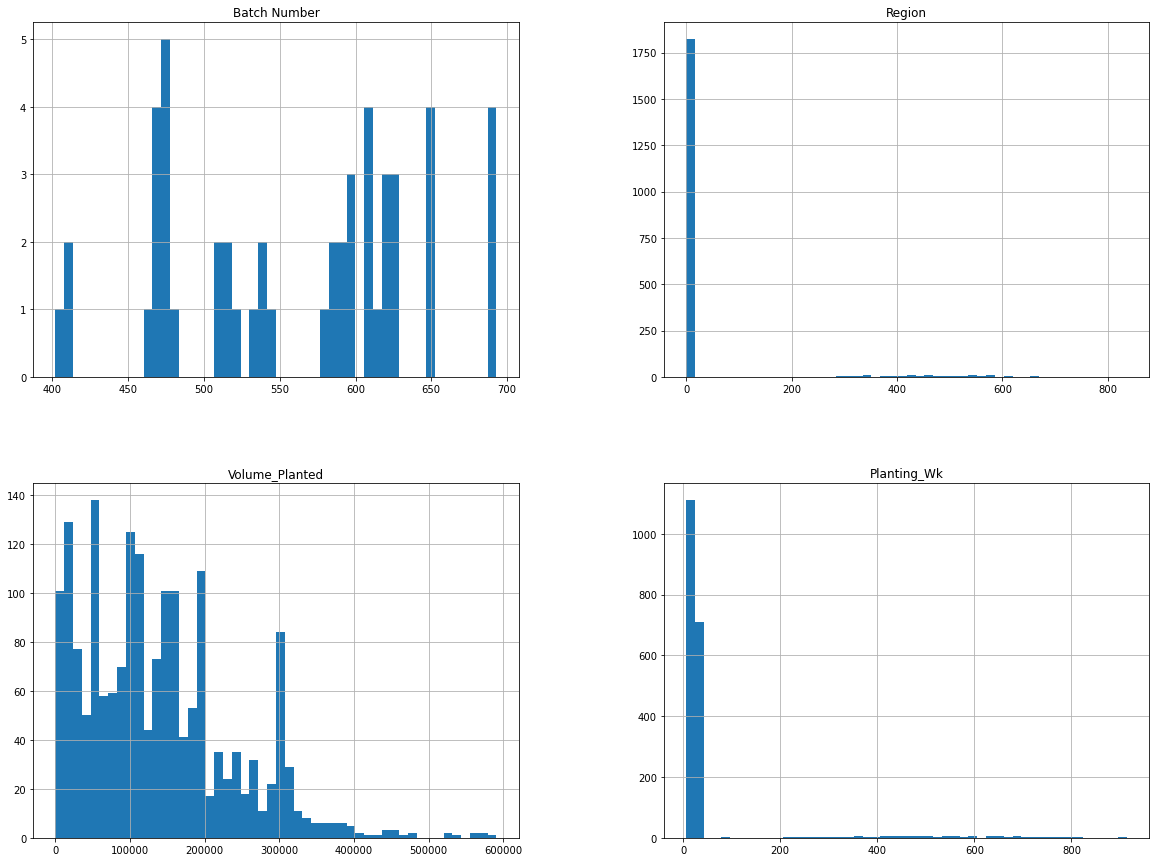

In [47]:
_ = pf.hist(bins=50, figsize=(20,15))